<a href="https://colab.research.google.com/github/ezzxdn/DIF62128_A_25_2311532001_Ezza-A/blob/master/Praktikum3/NaiveBayesModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load dataset
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy', 'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast', 'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(dataset_dict)
df.head()

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,85.0,85.0,False,No
1,sunny,80.0,90.0,True,No
2,overcast,83.0,78.0,False,Yes
3,rainy,70.0,96.0,False,Yes
4,rainy,68.0,80.0,False,Yes


In [19]:
# Prepare data for model

df = pd.get_dummies(df, columns=['Outlook'], prefix = '', prefix_sep = '', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)
df.head()

,Temperature,Humidity,Wind,Play,overcast,rainy,sunny
0,85.0,85.0,0,0,0,0,1
1,80.0,90.0,1,0,0,0,1
2,83.0,78.0,0,1,1,0,0
3,70.0,96.0,0,1,0,1,0
4,68.0,80.0,0,1,0,1,0


In [20]:
df.Temperature = pd.cut(df.Temperature, bins=[0, 80, 100], labels=['Warm', 'Hot'])
df.Humidity = pd.cut(df.Humidity, bins=[0, 75, 100], labels=['Dry', 'Humid'])

one_hot_columns = pd.get_dummies(df[['Temperature', 'Humidity']], drop_first=True, dtype=int)

df = df.drop(['Temperature', 'Humidity'], axis=1)

df = pd.concat([one_hot_columns, df], axis=1)

df.head()

,Temperature_Hot,Humidity_Humid,Wind,Play,overcast,rainy,sunny
0,1,1,0,0,0,0,1
1,0,1,1,0,0,0,1
2,1,1,0,1,1,0,0
3,0,1,0,1,0,1,0
4,0,1,0,1,0,1,0


In [21]:
# Split into training and testing data
X = df.drop('Play', axis=1)
y = df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, shuffle=False)

In [22]:
X_train.head()

,Temperature_Hot,Humidity_Humid,Wind,overcast,rainy,sunny
0,1,1,0,0,0,1
1,0,1,1,0,0,1
2,1,1,0,1,0,0
3,0,1,0,0,1,0
4,0,1,0,0,1,0


In [23]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf.fit(X_train, y_train)
BernoulliNB()
print(clf.predict(X[2:3]))

y_pred = clf.predict(X_test)

[1]


In [24]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 3,  3],
       [ 4, 10]])

Text(0.5, 1.1, 'Confusion Matrix')

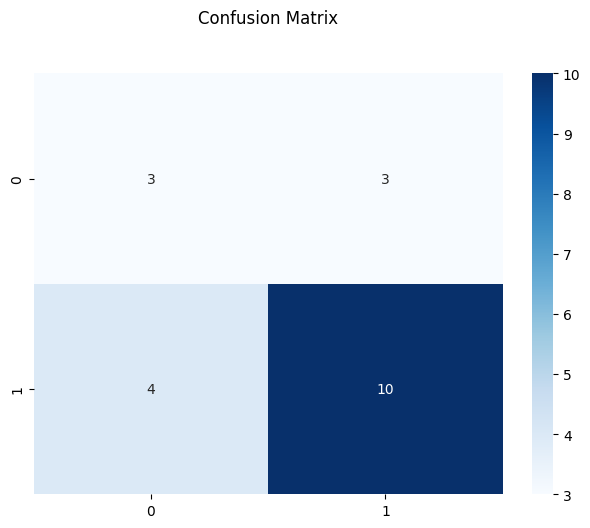

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)

In [27]:
from sklearn.metrics import classification_report
target_names = ['play', 'not play']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        play       0.43      0.50      0.46         6
    not play       0.77      0.71      0.74        14

    accuracy                           0.65        20
   macro avg       0.60      0.61      0.60        20
weighted avg       0.67      0.65      0.66        20

